# DATA PROCESS

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
path = '/home/shagen/Desktop/vscode/Kaggle-S5E5-PCE/ali/'

train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [29]:
train.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


<Axes: xlabel='Sex', ylabel='count'>

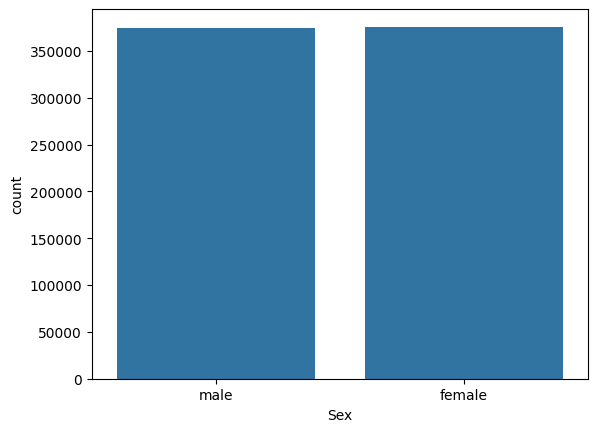

In [30]:
sns.countplot(x="Sex", data=train)

Min Age:  20
Max Age:  79
Avg Age:  41.420404


<Axes: xlabel='Age', ylabel='Count'>

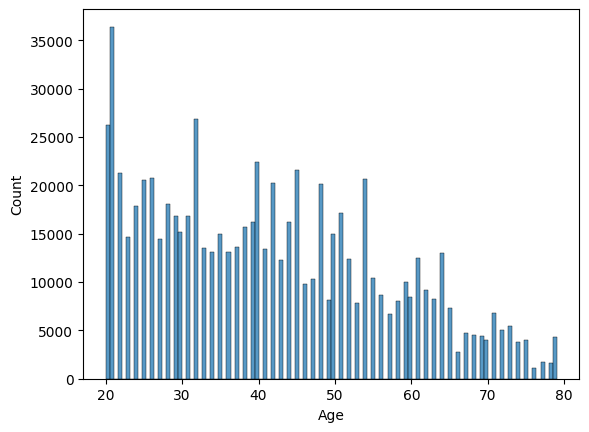

In [31]:
print("Min Age: ", min(train["Age"]))
print("Max Age: ", max(train["Age"]))
print("Avg Age: ", sum(train["Age"])/len(train["Age"]))
sns.histplot(train["Age"])

Min height:  126.0
Max height:  222.0
Avg height:  174.69768546666666


<Axes: xlabel='Height', ylabel='Count'>

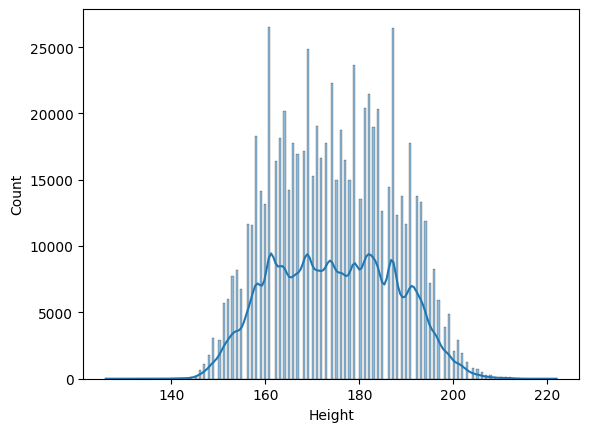

In [32]:
# Height stats
print("Min height: ", min(train["Height"]))
print("Max height: ", max(train["Height"]))
print("Avg height: ", sum(train["Height"])/len(train["Height"]))

# Visualizing distribution
sns.histplot(train["Height"].dropna(), kde=True)

Min weight:  36.0
Max weight:  132.0
Avg weight:  75.145668


<Axes: xlabel='Height', ylabel='Count'>

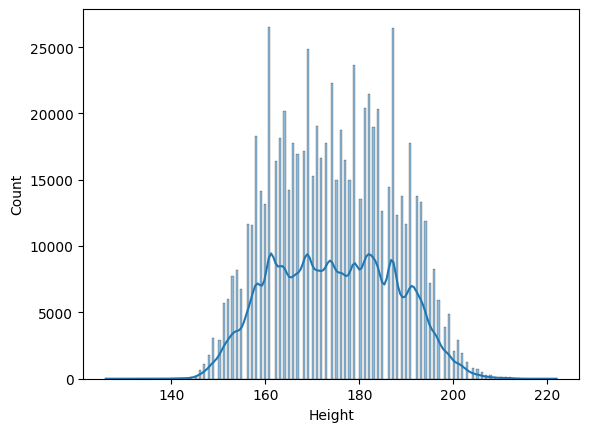

In [33]:
# Weight stats
print("Min weight: ", min(train["Weight"]))
print("Max weight: ", max(train["Weight"]))
print("Avg weight: ", sum(train["Weight"])/len(train["Weight"]))

# Visualizing distribution
sns.histplot(train["Height"].dropna(), kde=True)

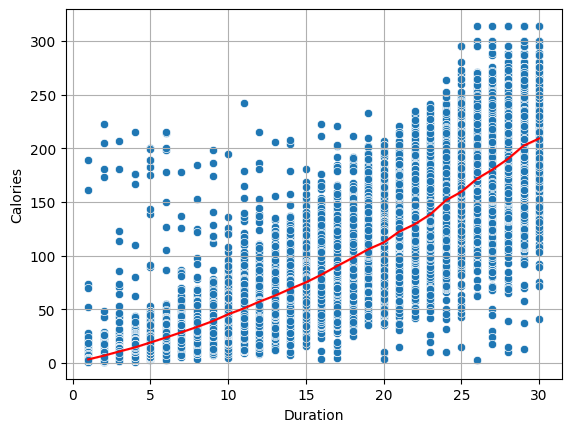

In [34]:
sns.scatterplot(x="Duration", y="Calories", data=train)
sns.lineplot(x="Duration", y = "Calories", color = "red", data=train)
plt.grid(True)
plt.show()

<Axes: xlabel='Heart_Rate', ylabel='Calories'>

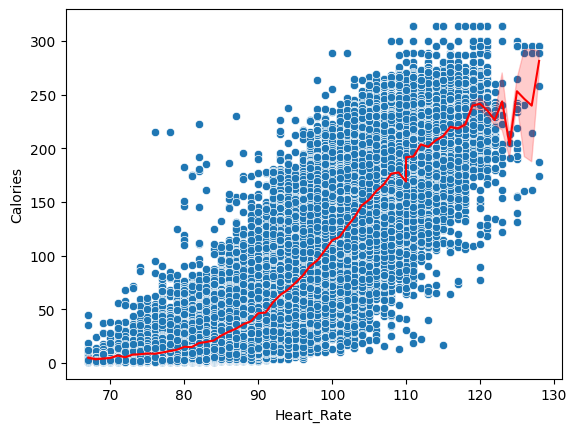

In [35]:
sns.scatterplot(x="Heart_Rate", y="Calories", data=train)
sns.lineplot(x="Heart_Rate", y="Calories", data=train, color="Red")

<Axes: xlabel='Body_Temp', ylabel='Calories'>

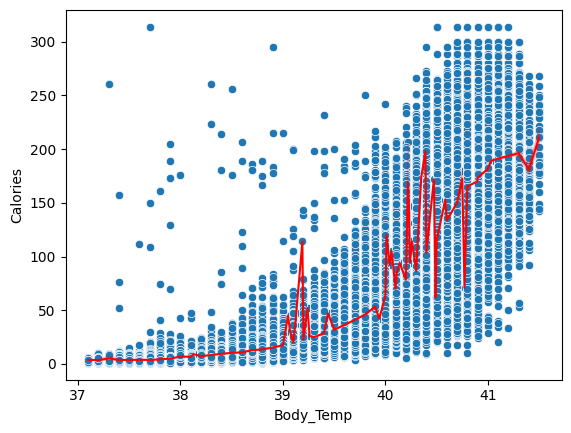

In [36]:
sns.scatterplot(x="Body_Temp", y="Calories", data=train)
sns.lineplot(x="Body_Temp", y="Calories", data=train, color="Red")

<Axes: xlabel='Height', ylabel='Calories'>

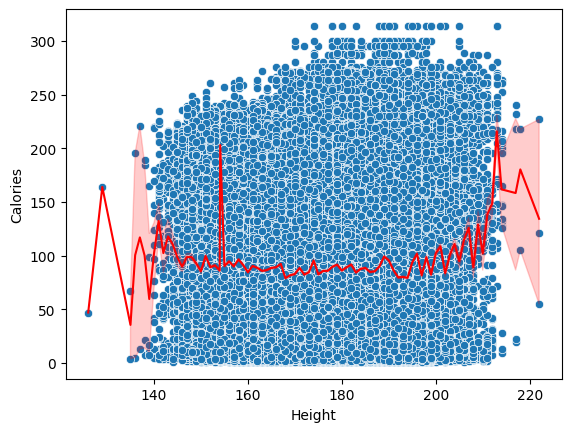

In [37]:
sns.scatterplot(x="Height", y="Calories", data=train)
sns.lineplot(x="Height", y="Calories", data=train, color="Red")

<Axes: xlabel='Weight', ylabel='Calories'>

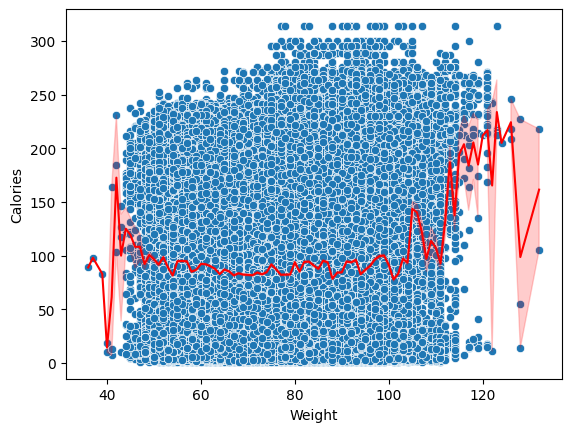

In [38]:
sns.scatterplot(x="Weight", y="Calories", data=train)
sns.lineplot(x="Weight", y="Calories", data=train, color="Red")

In [39]:
train["BMI"] = (train["Weight"] * 100*100 )/(train["Height"] * train["Height"])

In [40]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder = LabelEncoder()
scaler = StandardScaler()

train["Sex"] = encoder.fit_transform(train["Sex"])
test["Sex"] = encoder.fit_transform(test["Sex"])

In [41]:
from sklearn.model_selection import train_test_split

train_df = train.drop(columns = ["Calories", "id"])
labels = train["Calories"]

#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [42]:
from sklearn.metrics import mean_squared_log_error


def rmsle(y_pred, y_true):
    y_true = np.maximum(0, y_true) 
    y_pred = np.maximum(0, y_pred) 
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [ ]:
params = {
    'objective': 'regression',
    'metric': 'rmsle',
    'boosting_type': 'gbdt',
    'device_type': 'gpu',
    'num_leaves': 2611, 
    'max_depth': 13, 
    'learning_rate': 0.005426287233414167, 
    'feature_fraction': 0.9252784919242962, 
    'bagging_fraction': 0.941073112443699, 
    'bagging_freq': 1, 
    'min_child_samples': 64, 
    'min_child_weight': 2.5691071122538056, 
    'min_split_gain': 0.24146121614072177, 
    'lambda_l1': 0.670158619162032, 
    'lambda_l2': 2.881553998281732
}




In [ ]:
import lightgbm as lgb

model = lgb.train(
    params,
    dtrain,
    valid_sets=[dtrain, dval],
    valid_names=['train', 'valid'],
    num_boost_round=1000,
    early_stopping_rounds=50
)

In [53]:
import optuna
from optuna import Trial
import lightgbm as lgb
import numpy as np

def objective(trial: Trial, train_df, labels):
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',  # Sadece GBDT kullanıyoruz
        'verbosity': -1,

        # GPU ayarları
        'device_type': 'gpu',
        'gpu_platform_id': 0,
        'gpu_device_id': 0,
        'max_bin': 255,
        'tree_learner': 'data',

        # Ağaç yapısı
        'num_leaves': trial.suggest_int('num_leaves', 20, 3000),
        'max_depth': trial.suggest_int('max_depth', 5, 15),

        # Öğrenme
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),

        # Örnekleme
        'feature_fraction': trial.suggest_float('feature_fraction', 0.5, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.5, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),

        # Regülerizasyon
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'min_child_weight': trial.suggest_float('min_child_weight', 0.001, 10.0, log=True),
        'min_split_gain': trial.suggest_float('min_split_gain', 0.01, 0.5),
        'lambda_l1': trial.suggest_float('lambda_l1', 0.01, 5.0),
        'lambda_l2': trial.suggest_float('lambda_l2', 0.01, 5.0),
    }

    # RMSLE metriği
    def rmsle_eval(preds, train_data):
        labels = train_data.get_label()
        preds = np.maximum(preds, 0)
        labels = np.maximum(labels, 0)
        rmsle = np.sqrt(np.mean(np.power(np.log1p(preds) - np.log1p(labels), 2)))
        return 'rmsle', rmsle, False

    dtrain = lgb.Dataset(train_df, label=labels)

    cv_results = lgb.cv(
        params,
        dtrain,
        num_boost_round=10000,
        nfold=3,
        callbacks=[lgb.early_stopping(25)],
        feval=rmsle_eval,
        stratified=False,
        seed=42
    )

    return cv_results['valid rmsle-mean'][-1]

# ---- Optuna çalıştır ----
study = optuna.create_study(direction='minimize')
study.optimize(
    lambda trial: objective(trial, train_df, labels),
    n_trials=50,  # Geliştikçe 200 yapabilirsin
    n_jobs=1,
    gc_after_trial=True,
    show_progress_bar=True
)

# ---- En iyi sonuçlar ----
best_params = study.best_params
best_score = study.best_value

# scikit-learn uyumlu parametre seti
final_params = best_params.copy()
final_params.update({
    'objective': 'regression',
    'metric': 'rmse',
    'device': 'cuda',
    'verbose': -1,
    'n_estimators': 1000,
    'max_bin': 255,
    'tree_learner': 'data'
})

# sklearn uyumsuzları çıkar
final_params.pop('device_type', None)
final_params.pop('gpu_platform_id', None)
final_params.pop('gpu_device_id', None)

# ---- Model eğitimi ----
final_model = lgb.LGBMRegressor(**final_params)
final_model.fit(train_df, labels)

# ---- Çıktılar ----
print(f"Best score (RMSLE): {best_score}")
print(f"Best params: {best_params}")


[I 2025-05-15 00:14:39,298] A new study created in memory with name: no-name-3541e224-fb53-491d-b16a-46553fdf4c73


  0%|          | 0/50 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[527]	valid's rmse: 3.65125 + 0.0186057	valid's rmsle: 0.0639917 + 0.000434841
[I 2025-05-15 00:15:31,509] Trial 0 finished with value: 0.06399168442203522 and parameters: {'num_leaves': 1253, 'max_depth': 6, 'learning_rate': 0.06070909017542111, 'feature_fraction': 0.7707932914351119, 'bagging_fraction': 0.5018581139547569, 'bagging_freq': 5, 'min_child_samples': 84, 'min_child_weight': 2.047208947080801, 'min_split_gain': 0.3706540198589012, 'lambda_l1': 1.8818783831464976, 'lambda_l2': 2.75009653204811}. Best is trial 0 with value: 0.06399168442203522.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[5506]	valid's rmse: 3.61117 + 0.0152168	valid's rmsle: 0.062965 + 0.000311399
[I 2025-05-15 00:32:47,275] Trial 1 finished with value: 0.06296497061517442 and parameters: {'num_leaves': 2431, 'max_depth': 7, 'learning_rate': 0.002477456063783233

KeyboardInterrupt: 